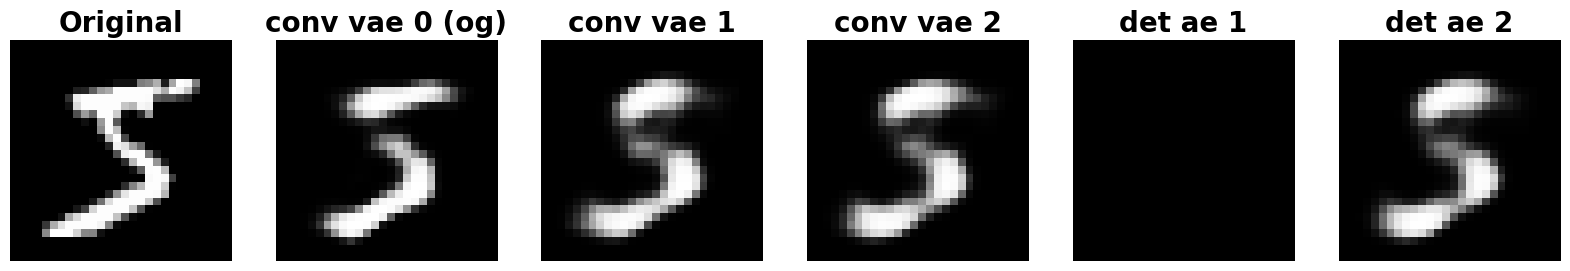

In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from functions import ExtractOuts
import matplotlib.pyplot as plt
import os

transform = transforms.Compose([transforms.ToTensor()])
test_dataset  = MNIST('../../Local Data Files/MNIST', transform=transform, download=True);
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False);

num_images = 10  # Number of images to process
model_names = [
    'conv vae 0 (og)', 
    'conv vae 1',
    'conv vae 2',
    'det ae 1',
    'det ae 2'
]

plt.figure(figsize=(20, 5))

with ExtractOuts(model_names[0], test_loader, num_images) as (images, _):
    plt.subplot(1, len(model_names) + 1, 1)
    plt.imshow(images[0].view(28, 28), cmap='gray')
    plt.title('Original', fontsize=20, fontweight='bold')
    plt.axis('off')

for i, model_path in enumerate(model_names, 1):
    with ExtractOuts(model_path, test_loader, num_images) as (_, recon_images):
        plt.subplot(1, len(model_names) + 1, i + 1) # adding 1 to skip first column (original image)
        plt.imshow(recon_images[0].view(28, 28), cmap='gray')
        plt.title(os.path.basename(model_path), fontsize=20, fontweight='bold')
        plt.axis('off')

plt.show()